<a href="https://colab.research.google.com/github/JOPloume/google-colab-notebooks/blob/main/data_preprocessing_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting to Google Drive to access files from Drive.

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/colab_notebooks/climate_precip.csv', sep=",")
df1.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


The dimension of the dataset:

In [64]:
df1.shape

(151110, 29)

In [65]:
df2 = pd.read_csv('/content/drive/MyDrive/colab_notebooks/climate_temp.csv', sep=",")
df2.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [66]:
df2.shape

(127020, 21)

Merge two data frames - INNER JOIN:

In [68]:
merged_df = pd.merge(df1, df2, on=["STATION", "DATE"])
merged_df.shape

(123005, 48)

Merge two data frames - OUTER JOIN:

In [69]:
outer_merged_df = pd.merge(df1, df2, how="outer", on=["STATION", "DATE"])
outer_merged_df.shape

(155125, 48)

Supervised learning: Sample test data - never look at it again

In [70]:
sample_test_data = outer_merged_df.sample(frac =.25)
sample_test_data.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
31484,GHCND:USC00044211,IDYLLWILD FIRE DEPARTMENT CA US,20100405,0.09,-9999.0,-66.6,0.28,-9999.0,-66.6,0.68,-9999.0,-66.6,0.39,0.7,14.43,23.3,163.0,122.0,57.0,21.0,-9999.0,-9999.0,-9999.0,-9999.0,53.0,44.0,-9999.0,24.0,12.0,IDYLLWILD FIRE DEPARTMENT CA US,1639.8,33.7572,-116.7066,4.0,2.0,-7777.0,-7777.0,-7777.0,-7777.0,0.0,0.0,1.0,2.0,4.0,8.0,10.0,13.0,18.0
104476,GHCND:USC00046175,NEWPORT BEACH HARBOR CA US,20100328,0.06,-9999.0,-9999.0,0.14,-9999.0,-9999.0,0.42,-9999.0,-9999.0,1.56,0.0,6.22,0.0,135.0,84.0,26.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEWPORT BEACH HARBOR CA US,3,33.6031,-117.8836,13.0,8.0,3.0,2.0,1.0,-7777.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,1.0,3.0,7.0
139624,GHCND:USC00044278,INYOKERN CA US,20100714,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.06,0.0,2.98,0.2,17.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INYOKERN CA US,743.7,35.6521,-117.8244,40.0,35.0,30.0,28.0,25.0,20.0,15.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122423,GHCND:USC00046896,PINE FLAT DAM CA US,20100529,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.71,0.0,13.63,0.0,54.0,36.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26320,GHCND:USW00023257,MERCED MUNICIPAL AIRPORT CA US,20100210,-9999.00,-9999.0,-9999.0,-9999.00,-9999.0,-9999.0,-9999.00,-9999.0,-9999.0,0.77,-9999.0,3.38,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,MERCED MUNICIPAL AIRPORT CA US,46.3,37.28472,-120.51278,4.0,1.0,-7777.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,2.0,6.0,8.0,11.0,16.0


Getting descriptive statistics of the numerical features:

In [80]:
outer_merged_df.describe(include="all")

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_NAME_y,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
count,155125,151110,1.551250e+05,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,151110.000000,127020,127020,127020,127020,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000,127020.000000
unique,425,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347,310,389,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GHCND:USC00042771,SAN JOSE CA US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN JOSE CA US,61,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,365,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730,1825,1607,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.010067e+07,-1983.400927,-9099.834584,-8477.923237,-1983.332954,-9099.703084,-8477.890501,-1983.185442,-9099.506492,-8477.832838,1.019360,-2849.609671,13.704885,-2844.786476,-1871.283628,-2071.147429,-2208.350572,-2335.718463,-3384.903891,-3315.576196,-3346.827655,-3334.358150,-2986.839944,-2978.298915,-2917.628595,-2964.431904,-2947.388935,NaN,NaN,NaN,NaN,-305.681680,-571.357164,-1364.776594,-1610.030515,-1993.233766,-2300.983097,-2409.871020,-2355.161754,-1797.129413,-2160.404653,-2134.298292,-1867.945599,-1801.272060,-1697.664328,-1214.191041
std,NaN,NaN,3.450030e+02,3984.261185,2786.079371,3579.071334,3984.295025,2786.509451,3579.148894,3984.368470,2787.152875,3579.285544,1.559976,4514.042489,10.798821,4517.128935,4060.994764,4154.288671,4188.374424,4247.919384,4745.858699,4714.756621,4730.176154,4724.054831,4583.847202,4578.691929,4545.964565,4569.642516,4560.662765,NaN,NaN,NaN,NaN,1550.917511,2050.944179,2968.682933,3159.342811,3401.256167,3553.088077,3598.276966,3574.876074,3278.714446,3484.418347,3472.336747,3326.150925,3285.663313,3219.225586,2834.496038
min,NaN,NaN,2.010010e+07,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-9999.000000,0.010000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,NaN,NaN,NaN,NaN,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000,-7777.000000
25%,NaN,NaN,2.010040e+07,-6.660000,-9999.000000,-9999.000000,-6.660000,-9999.000000,-9999.000000,-6.660000,-9999.000000,-9999.000000,0.080000,-9999.000000,6.160000,-9999.000000,11.000000,3.000000,0.000000,0.000000,-9999.000000,-9999.0

DATE                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
DLY-PRCP-25PCTL    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
DLY-SNWD-25PCTL    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
DLY-SNOW-25PCTL       AxesSubplot(0.125,0.391471;0.227941x0.222059)
DLY-PRCP-50PCTL    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
DLY-SNWD-50PCTL    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

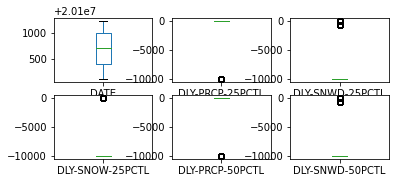

In [95]:
outer_merged_df.loc[:,'DATE':'DLY-SNWD-50PCTL'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

Calculating % of missing values in each column

In [108]:
data = outer_merged_df.copy()
output1 = data.isnull().sum()
output2 = data.isnull().count()

output1 / output2


STATION                    0.000000
STATION_NAME_x             0.025882
DATE                       0.000000
DLY-PRCP-25PCTL            0.025882
DLY-SNWD-25PCTL            0.025882
DLY-SNOW-25PCTL            0.025882
DLY-PRCP-50PCTL            0.025882
DLY-SNWD-50PCTL            0.025882
DLY-SNOW-50PCTL            0.025882
DLY-PRCP-75PCTL            0.025882
DLY-SNWD-75PCTL            0.025882
DLY-SNOW-75PCTL            0.025882
MTD-PRCP-NORMAL            0.025882
MTD-SNOW-NORMAL            0.025882
YTD-PRCP-NORMAL            0.025882
YTD-SNOW-NORMAL            0.025882
DLY-PRCP-PCTALL-GE001HI    0.025882
DLY-PRCP-PCTALL-GE010HI    0.025882
DLY-PRCP-PCTALL-GE050HI    0.025882
DLY-PRCP-PCTALL-GE100HI    0.025882
DLY-SNWD-PCTALL-GE001WI    0.025882
DLY-SNWD-PCTALL-GE010WI    0.025882
DLY-SNWD-PCTALL-GE003WI    0.025882
DLY-SNWD-PCTALL-GE005WI    0.025882
DLY-SNOW-PCTALL-GE001TI    0.025882
DLY-SNOW-PCTALL-GE010TI    0.025882
DLY-SNOW-PCTALL-GE100TI    0.025882
DLY-SNOW-PCTALL-GE030TI    0

In [128]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(data.loc[:,"STATION_NAME_x":"DATE"])


array([['TWENTYNINE PALMS CA US', 20100101],
       ['TWENTYNINE PALMS CA US', 20100102],
       ['TWENTYNINE PALMS CA US', 20100103],
       ...,
       ['ACAMPO 5 NE CA US', 20101229],
       ['ACAMPO 5 NE CA US', 20101230],
       ['ACAMPO 5 NE CA US', 20101231]], dtype=object)